<a href="https://colab.research.google.com/github/ketanpandey01/FIFA-19_Regression/blob/master/FIFA'19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Market Price Value Prediction

###Welcome to FIFA'19! Our task is to predict the market value price of a football player, given FIFA'19 video game dataset..

#Get the data

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import pandas as pd
fifa_raw_dataset = pd.read_csv('/content/drive/My Drive/FIFA_data.csv')

##Take a look at the data and the datastructure.

In [3]:
fifa_raw_dataset.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
fifa_raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

#Feature Selection
####Selecting features based on the intuition.

In [5]:
features = ['International Reputation', 'Overall', 'Potential', 'Reactions', 'Composure', 'Value']
fifa_dataset = fifa_raw_dataset[[*features]]
fifa_dataset.head()

,International Reputation,Overall,Potential,Reactions,Composure,Value
0,5.0,94,94,95.0,96.0,€110.5M
1,5.0,94,94,96.0,95.0,€77M
2,5.0,92,93,94.0,94.0,€118.5M
3,4.0,91,93,90.0,68.0,€72M
4,4.0,91,92,91.0,88.0,€102M


####For the purpose of exploring and visualizing the dataset, we need to first parse and convert the 'Value' feature (which is our output label) to number form.

In [6]:
#parse string for millions and thousands to numeric values
def parseValue(strVal):
    if 'M' in strVal:
        return int(float(strVal.replace('M', '')) * 1000000)
    elif 'K' in strVal:
        return int(float(strVal.replace('K', '')) * 1000)
    else:
        return int(strVal)

#remove € character, leave just numbers
fifa_dataset['Value'] = fifa_dataset['Value'].str.replace('€', '')

fifa_dataset['Value'] = fifa_dataset['Value'].apply(lambda x: parseValue(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [7]:
fifa_dataset.head()

,International Reputation,Overall,Potential,Reactions,Composure,Value
0,5.0,94,94,95.0,96.0,110500000
1,5.0,94,94,96.0,95.0,77000000
2,5.0,92,93,94.0,94.0,118500000
3,4.0,91,93,90.0,68.0,72000000
4,4.0,91,92,91.0,88.0,102000000


In [8]:
fifa_dataset.describe()

,International Reputation,Overall,Potential,Reactions,Composure,Value
count,18159.000000,18207.000000,18207.000000,18159.000000,18159.000000,1.820700e+04
mean,1.113222,66.238699,71.307299,61.836610,58.648274,2.410696e+06
std,0.394031,6.908930,6.136496,9.010464,11.436133,5.594933e+06
min,1.000000,46.000000,48.000000,21.000000,3.000000,0.000000e+00
25%,1.000000,62.000000,67.000000,56.000000,51.000000,3.000000e+05
50%,1.000000,66.000000,71.000000,62.000000,60.000000,6.750000e+05
75%,1.000000,71.000000,75.000000,68.000000,67.000000,2.000000e+06
max,5.000000,94.000000,95.000000,96.000000,96.000000,1.185000e+08


# Discover and visualize the data to gain insights

In [0]:
fifa_dataset_vis = fifa_dataset.copy()

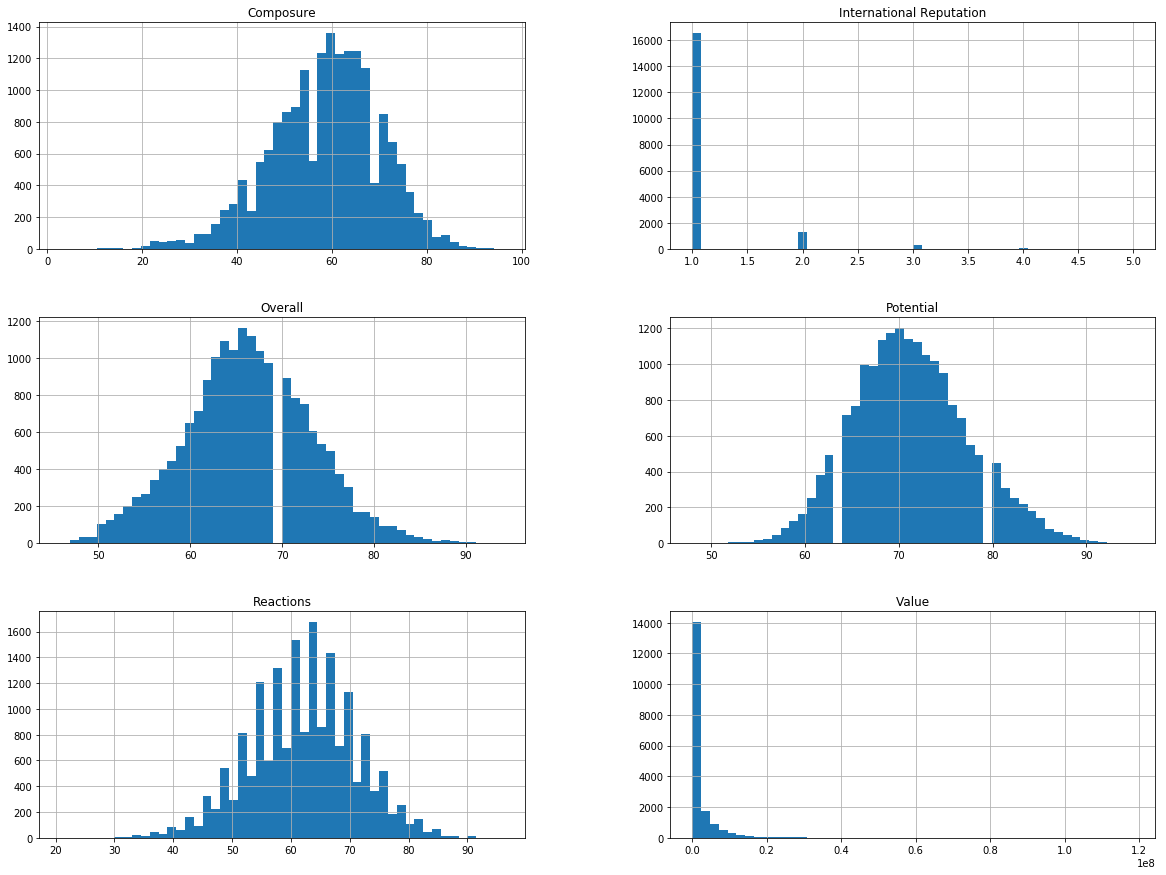

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
fifa_dataset_vis.hist(bins=50, figsize=(20,15))
plt.show()

##Find Correlations

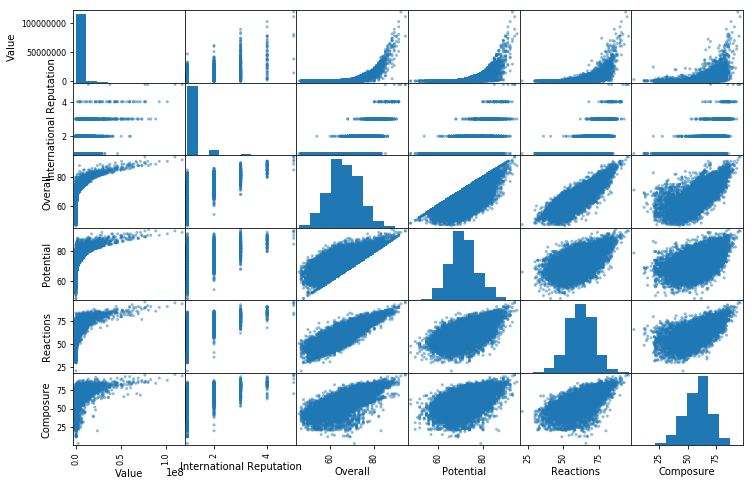

In [11]:
from pandas.plotting import scatter_matrix

attributes = ["Value", "International Reputation", "Overall",
              "Potential", "Reactions", "Composure"]
scatter_matrix(fifa_dataset_vis[attributes], figsize=(12, 8))
plt.show()

#Remove Outliers
####It is evident by plotting the histogram and the correlations between features, that our output label 'Value', contains outliers.
####Actually, they are not the outliers, but the top players playing for the top clubs.

####There are many ways to solve this like, either predict market value of a player based on top clubs or top leagues, or just remove the outlier and predict the average market price of footballers.
####For now, I'll go with removing the outliers.



In [12]:
fifa_raw_dataset[['Name','Value']].head(10)

,Name,Value
0,L. Messi,€110.5M
1,Cristiano Ronaldo,€77M
2,Neymar Jr,€118.5M
3,De Gea,€72M
4,K. De Bruyne,€102M
5,E. Hazard,€93M
6,L. Modrić,€67M
7,L. Suárez,€80M
8,Sergio Ramos,€51M
9,J. Oblak,€68M


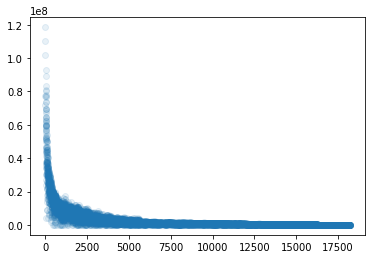

In [13]:
plt.scatter(fifa_dataset_vis['Value'].index, fifa_dataset_vis['Value'], alpha=0.1)
plt.show()


In [0]:
fifa_dataset_pro = fifa_dataset.iloc[800:]

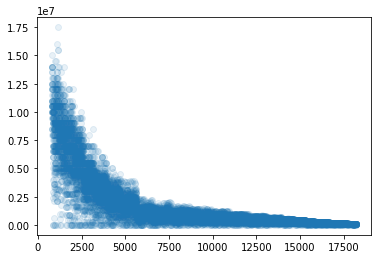

In [15]:
plt.scatter(fifa_dataset_pro['Value'].index, fifa_dataset_pro['Value'], alpha=0.1)
plt.show()

#Creating Test Set

In [0]:
# to make this notebook's output identical at every run
import numpy as np
np.random.seed(42)

In [0]:

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [0]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(fifa_dataset_pro, test_size=0.2, random_state=42)

In [19]:
print('Train',' ','Test')
print(len(train_set),'+',len(test_set),'=',len(train_set)+len(test_set))

Train   Test
13925 + 3482 = 17407


# Prepare the data for Machine Learning algorithms

##Data Cleaning

In [20]:
#FOR TESTING
l = list(train_set['Value'] == 0)
print(len([v for v in l if v==True] ))
train_set.isnull().any()



193


International Reputation     True
Overall                     False
Potential                   False
Reactions                    True
Composure                    True
Value                       False
dtype: bool

In [0]:
train_set = train_set.replace(0, pd.np.nan)

In [22]:
#FOR TESTING
l = list(train_set['Value'] == 0)
print(len([v for v in l if v==True] ))

0


### *Replace 'NaN' values with the mean.*

In [0]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [24]:
imputer.fit(train_set)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [25]:
imputer.statistics_

array([1.0e+00, 6.6e+01, 7.1e+01, 6.2e+01, 5.9e+01, 6.5e+05])

In [0]:
tf = imputer.transform(train_set)

In [0]:
fifa_dataset_tf = pd.DataFrame(tf, columns=fifa_dataset.columns)

In [28]:
fifa_dataset_tf.head()

,International Reputation,Overall,Potential,Reactions,Composure,Value
0,1.0,70.0,70.0,66.0,67.0,900000.0
1,1.0,68.0,76.0,61.0,65.0,650000.0
2,1.0,62.0,71.0,54.0,36.0,350000.0
3,1.0,76.0,83.0,75.0,73.0,9500000.0
4,1.0,65.0,65.0,61.0,63.0,160000.0


In [29]:
fifa_dataset_tf.isnull().any()

International Reputation    False
Overall                     False
Potential                   False
Reactions                   False
Composure                   False
Value                       False
dtype: bool

##Seperate the Features and Label

In [0]:
fifa_dataset_features = fifa_dataset_tf.drop("Value", axis=1) # drop labels for training set
fifa_dataset_labels = fifa_dataset_tf["Value"].copy()

# Select and train a model 

##Training and Evaluating on the Training Set

###Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(fifa_dataset_features, fifa_dataset_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
# let's try the full preprocessing pipeline on a few training instances
some_data_features = fifa_dataset_features.iloc[:5]
some_data_labels = fifa_dataset_labels.iloc[:5]

print("Predictions:", lin_reg.predict(some_data_features))

Predictions: [2178311.4786873  2556764.27096618  768632.03555231 4882207.63647876
  697092.81237992]


In [33]:
print("Labels:", list(some_data_labels))

Labels: [900000.0, 650000.0, 350000.0, 9500000.0, 160000.0]


In [34]:
from sklearn.metrics import mean_squared_error

fifa_dataset_predictions = lin_reg.predict(fifa_dataset_features)
lin_mse = mean_squared_error(fifa_dataset_labels, fifa_dataset_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1437532.7418951942

In [35]:
lin_reg.score(fifa_dataset_features,fifa_dataset_labels)

0.5871462199776185

In [37]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(fifa_dataset_labels, fifa_dataset_predictions)
lin_mae

1007250.4391249976

###Decision Trees

In [38]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(fifa_dataset_features, fifa_dataset_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [39]:
fifa_dataset_predictions = tree_reg.predict(fifa_dataset_features)
tree_mse = mean_squared_error(fifa_dataset_labels, fifa_dataset_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

183816.2275108255

In [40]:
tree_reg.score(fifa_dataset_features,fifa_dataset_labels)

0.9932496160959139

##Evaluation using Cross-Validation

In [0]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, fifa_dataset_features, fifa_dataset_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [43]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [747288.30134268 768430.30923239 688876.42653087 753323.25582161
 784665.15263137 792978.63079703 767720.25953254 721241.71036152
 853465.0449212  757725.87342149]
Mean: 763571.4964592688
Standard deviation: 41481.19656315034


In [44]:
lin_scores = cross_val_score(lin_reg, fifa_dataset_features, fifa_dataset_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [1404013.57957879 1380193.74014831 1416403.0892201  1438985.04822049
 1526747.85757374 1403936.9233861  1470503.39735779 1461202.63914964
 1486255.03770827 1388779.26024171]
Mean: 1437702.057258496
Standard deviation: 45106.194951212485


##Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(fifa_dataset_features, fifa_dataset_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [46]:
fifa_dataset_predictions = forest_reg.predict(fifa_dataset_features)
forest_mse = mean_squared_error(fifa_dataset_labels, fifa_dataset_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

271740.9764557166

In [47]:
forest_reg.score(fifa_dataset_features,fifa_dataset_labels)

0.9852473160602657

In [48]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, fifa_dataset_features, fifa_dataset_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [566450.05473668 588008.07619306 542097.54732124 617962.14768877
 630318.92872315 638291.47323493 641590.68003116 572757.50991577
 601997.82081488 672752.61636113]
Mean: 607222.6855020768
Standard deviation: 38180.37814010691


##Support Vector Machine(SVM)

In [49]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(fifa_dataset_features, fifa_dataset_labels)
fifa_dataset_predictions = svm_reg.predict(fifa_dataset_features)
svm_mse = mean_squared_error(fifa_dataset_labels, fifa_dataset_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

2050929.8403703873

#Fine-Tune the Model

##Grid Search

In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 3, 4]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(fifa_dataset_features, fifa_dataset_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 3, 4]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [54]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [55]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [57]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

681476.1835552163 {'max_features': 2, 'n_estimators': 3}
625151.4492146384 {'max_features': 2, 'n_estimators': 10}
606468.8666560233 {'max_features': 2, 'n_estimators': 30}
680822.9798993804 {'max_features': 3, 'n_estimators': 3}
625299.548506517 {'max_features': 3, 'n_estimators': 10}
608229.7198192027 {'max_features': 3, 'n_estimators': 30}
682120.4108522338 {'max_features': 4, 'n_estimators': 3}
637368.1918320889 {'max_features': 4, 'n_estimators': 10}
615238.9215747366 {'max_features': 4, 'n_estimators': 30}
716835.9758672747 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
666704.6539782989 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
708077.6714998434 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
673971.5871931455 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
718221.9953119886 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
687635.222179118 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


In [58]:
final_model = grid_search.best_estimator_
final_model.fit(fifa_dataset_features, fifa_dataset_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

#Evaluate the model on the Test Set

In [66]:
#FOR TESTING
l = list(test_set['Value'] == 0)
print(len([v for v in l if v==True] ))
test_set.isnull().any()



0


International Reputation     True
Overall                     False
Potential                   False
Reactions                    True
Composure                    True
Value                        True
dtype: bool

In [0]:
test_set = test_set.replace(0, pd.np.nan)

In [65]:
#FOR TESTING
l = list(test_set['Value'] == 0)
print(len([v for v in l if v==True] ))

0


In [0]:
tf = imputer.transform(test_set)

In [0]:
fifa_dataset_tf = pd.DataFrame(tf, columns=fifa_dataset.columns)

In [69]:
fifa_dataset_tf.head()

,International Reputation,Overall,Potential,Reactions,Composure,Value
0,1.0,64.0,67.0,51.0,56.0,575000.0
1,1.0,73.0,77.0,73.0,67.0,5000000.0
2,2.0,73.0,78.0,68.0,68.0,5500000.0
3,3.0,77.0,77.0,73.0,75.0,7000000.0
4,1.0,63.0,73.0,58.0,33.0,650000.0


In [70]:
fifa_dataset_tf.isnull().any()

International Reputation    False
Overall                     False
Potential                   False
Reactions                   False
Composure                   False
Value                       False
dtype: bool

##Seperate the Features and Label

In [0]:
fifa_dataset_features = fifa_dataset_tf.drop("Value", axis=1) # drop labels for training set
fifa_dataset_labels = fifa_dataset_tf["Value"].copy()

In [80]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(fifa_dataset_features)

final_mse = mean_squared_error(fifa_dataset_labels, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

604961.825357894

In [81]:
from sklearn.metrics import r2_score
final_model_score = r2_score(fifa_dataset_labels, final_predictions)  
final_model_score

0.9282211605298462